In [1]:
# To correct LS images with heavy outer rings due to primary antibody concentration too high
# uses otsu's method for thresholding, then set every pixel above the threshold = threshold

import matplotlib.pyplot as plt

import numpy as np

from skimage import io
from skimage import data
from skimage.filters import threshold_otsu

In [3]:

stack='D:\AL175\AL175_25.0um.mhd'

In [6]:
im = io.imread(stack)

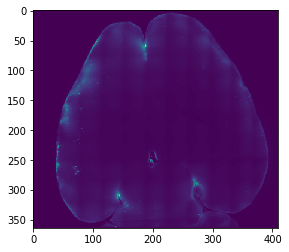

In [13]:
im_slice=im[100,:,:]
plt.imshow(im_slice)

In [15]:
thresh = threshold_otsu(im_slice)
binary = im_slice > thresh

In [20]:
im_slice[binary]=thresh

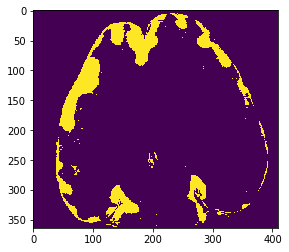

In [23]:
plt.imshow(im_slice==thresh)

In [26]:
io.imsave('D:\AL175\\test.tiff', im_slice)

D:\AL175\test.tiff is a low contrast image


In [41]:
z,y,x=im.shape
new_im=np.zeros([z,y,x])

In [47]:
# now loop
for i in range (z):
    im_temp= im[i,:,:]
    thresh = threshold_otsu(im_temp)
    binary = im_temp > thresh
    im_temp[binary]=thresh
    im[i,:,:]= im_temp

In [48]:
io.imsave('D:\AL175\\test.tiff', im)

In [46]:
im[0,:,:]

Array([[  1,   2,   3, ...,  88,  88,  88],
       [ 33,  73,  74, ..., 100, 100, 100],
       [ 45,  99,  99, ..., 100, 100, 100],
       ...,
       [ 99,  99,  99, ..., 100,  50,   0],
       [ 99,  99,  99, ...,  98,  49,   0],
       [ 97,  96,  96, ...,  35,  17,   0]], dtype=uint16)